## **3가지 Clustering 알고리즘을 적용하면 3번이 제일 좋을 듯**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (15, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. K-means
<img src='https://i.imgur.com/tBkCqXJ.gif'>

1. 그룹의 개수를 k개로 정하여 임의로 centroid로 지정
2. 모든 instance를 가장 가까운 거리에 있는 그룹으로 지정
3. 두 개의 클러스터의 새로운 centroid를 생성
4. 모든 instance를 가장 가까운 거리에 있는 centroid의 그룹 재지정

In [3]:
path = '/content/drive/MyDrive/이대과제/excel/학원교습소정보_강남구_양천구_위경도.xlsx'
df = pd.read_excel(path)
df

,학원교습소구분명,시설도로명주소,경도,위도
0,교습소,서울특별시 강남구 도곡로 405,127.054668,37.497369
1,교습소,서울특별시 강남구 삼성로61길 41,127.057139,37.498445
2,교습소,서울특별시 강남구 삼성로63길 19,127.058593,37.499494
3,교습소,서울특별시 강남구 개포로82길 7,127.067333,37.488755
4,교습소,서울특별시 서초구 바우뫼로20길 25,127.034088,37.474107
...,...,...,...,...
10817,학원,서울특별시 양천구 목동서로 100,126.874169,37.534224
10818,학원,서울특별시 양천구 국회대로 92,126.845261,37.526895
10819,학원,서울특별시 양천구 목동서로 77,126.877988,37.535963
10820,학원,서울특별시 양천구 목동서로 285,126.869140,37.521857


In [4]:
X = df[['경도', '위도']].values

In [5]:
from sklearn.cluster import KMeans

k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_transform(X)

print('\n')
np.argmin(kmeans.fit_transform(X), axis=1) # 9개의 그룹과의 거리가 가장 가까운 그룹 label

array([2, 2, 2, ..., 1, 1, 1])

In [6]:
kmeans.fit_predict(X) # y_pred = kmeans.fit_predict(X)
print('\n')
kmeans.labels_ # y_pred is kmeans.labels_
print('\n')
kmeans.cluster_centers_ # 9개 cluster의 centroids_ (i.e., cluster centers) 위치(좌표)

array([[127.04840267,  37.63900382],
       [126.87132927,  37.53129681],
       [127.06042385,  37.49566934],
       [127.14593204,  37.54768122],
       [126.92756303,  37.47397246],
       [126.8329702 ,  37.55521213],
       [127.0861238 ,  37.54417261],
       [127.03268559,  37.51536372],
       [126.85589672,  37.50339686]])

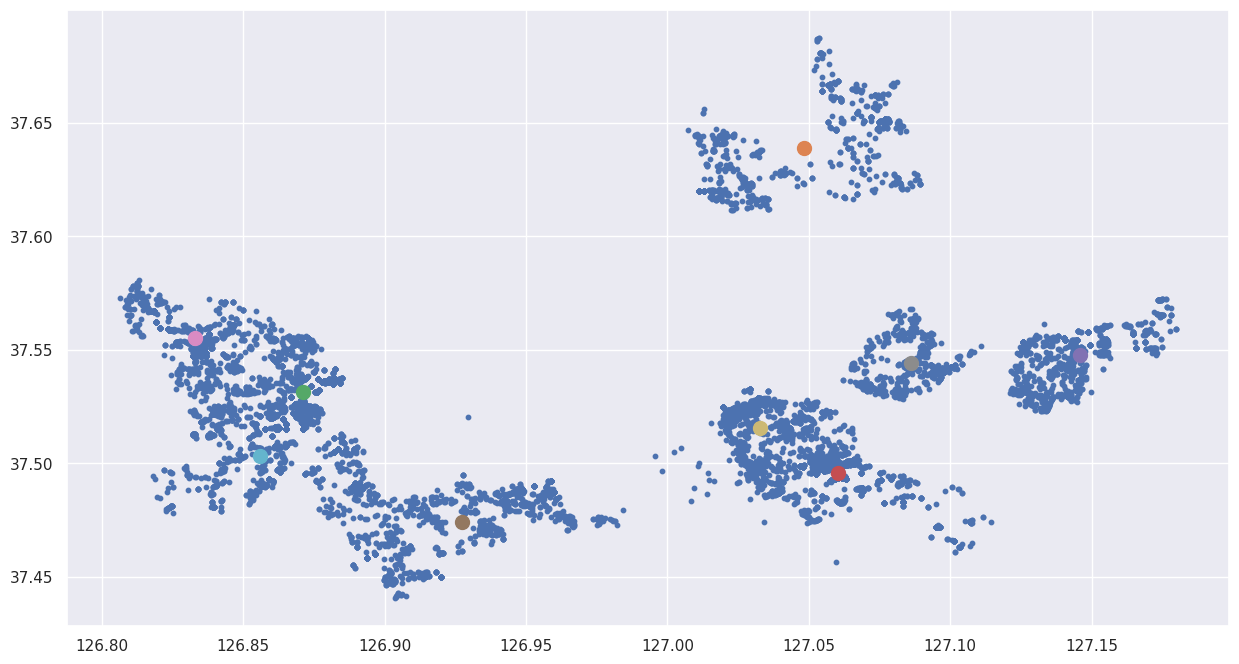

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=10)

for i in range(k):
  plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100)

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

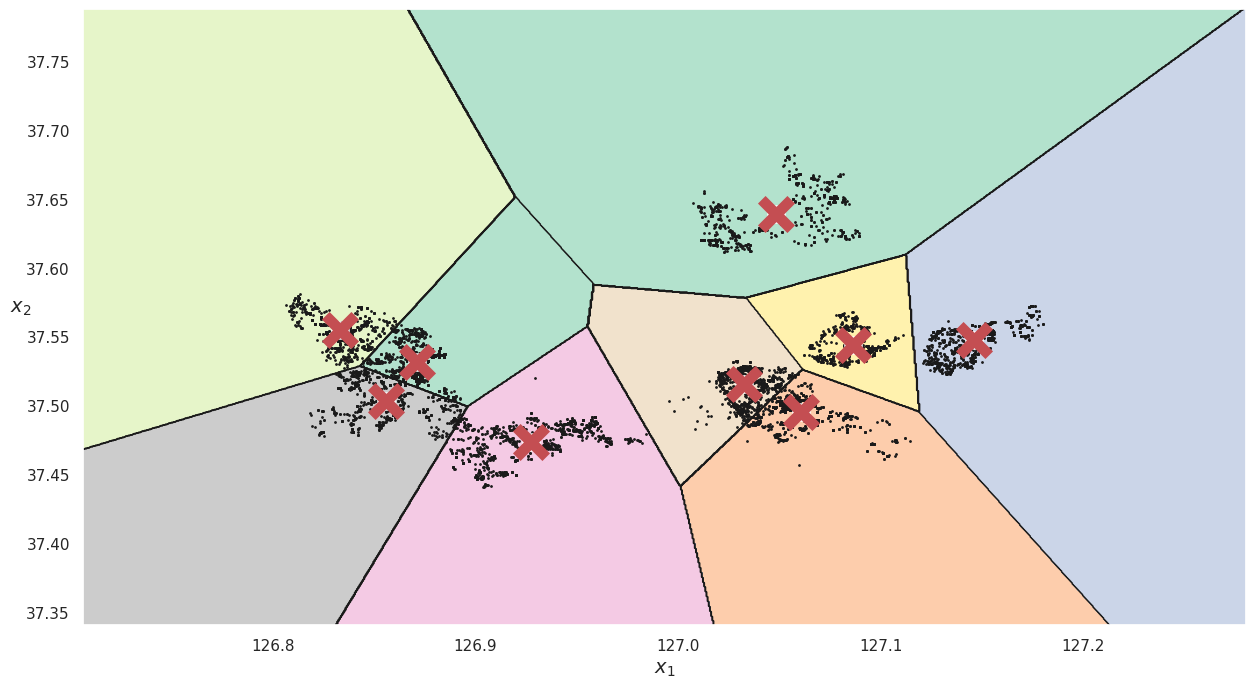

In [9]:
plot_decision_boundaries(kmeans, X)
plt.show()

### **2. Expectation–maximization algorithm**
#### **Multivariates Gaussian Mixture Model**
- https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm
<img src='https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif' width =600>

In [10]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=9, random_state=42)
y_pred = gmm.fit(X).predict(X)

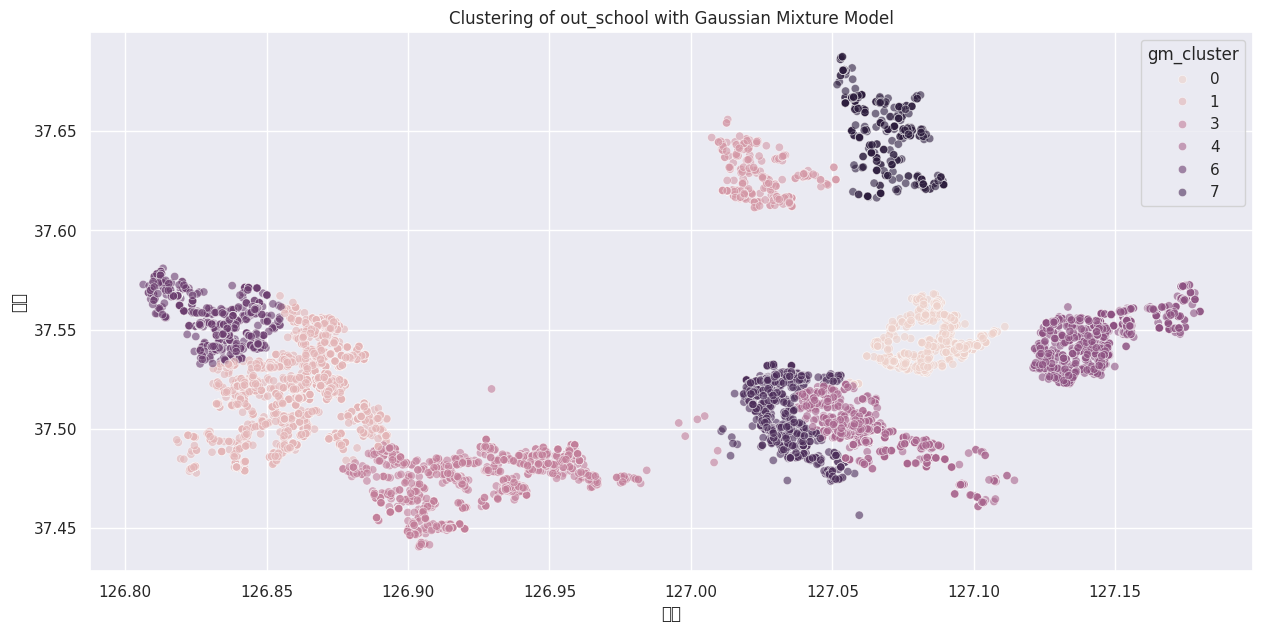

In [11]:
# Add cluster labels to the DataFrame
df['gm_cluster'] = y_pred

# Create scatter plot
plt.figure(figsize=(15, 7))
sns.scatterplot(x='경도', y='위도', hue='gm_cluster', data=df, alpha=0.6)
plt.title('Clustering of out_school with Gaussian Mixture Model')
plt.show()

## **3. DBSCAN(Density-based spatial clustering of applications with noise)**
<img src='https://miro.medium.com/max/1380/0*iIwf8kxf5YKIGhd1.gif'>

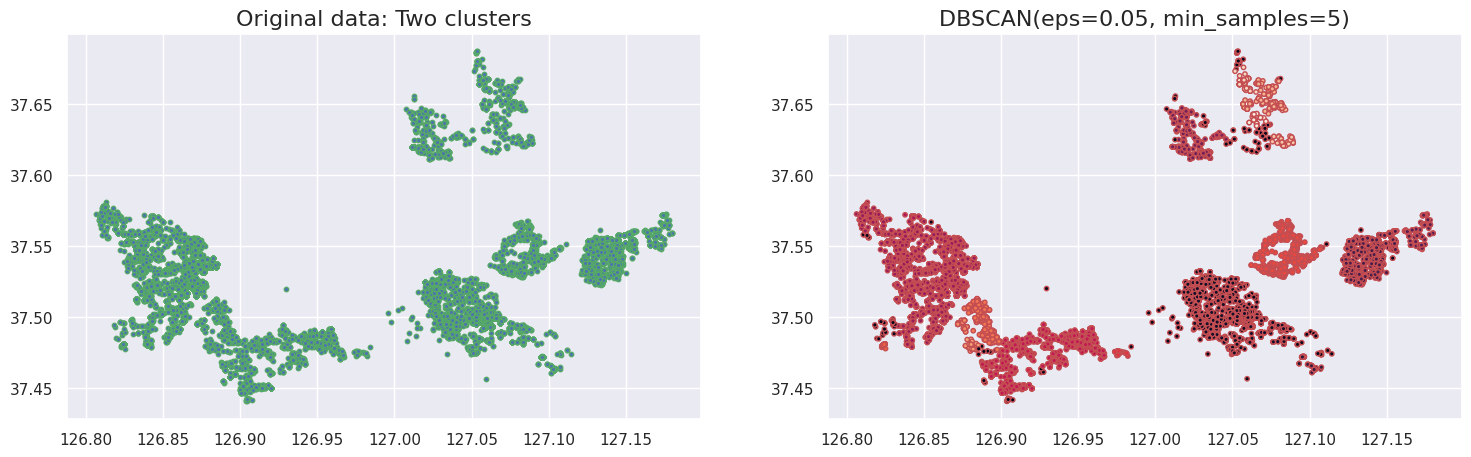

In [12]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.title('Original data: Two clusters', fontsize=16)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor='g')

plt.subplot(122)
dbscan1 = DBSCAN(eps=0.005, min_samples=20)
plt.title('DBSCAN(eps=0.05, min_samples=5)', fontsize=16)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=dbscan1.fit(X).labels_, s=10, edgecolor='r')

### **3가지 Clustering한 결과를 데이터로**

In [13]:
# Get the cluster labels

# Get the other cluster labels
df['kmeans_cluster'] = kmeans.predict(X)
df['dbcan_cluster'] = dbscan1.labels_
df.head()

,학원교습소구분명,시설도로명주소,경도,위도,gm_cluster,kmeans_cluster,dbcan_cluster
0,교습소,서울특별시 강남구 도곡로 405,127.054668,37.497369,4,2,0
1,교습소,서울특별시 강남구 삼성로61길 41,127.057139,37.498445,4,2,0
2,교습소,서울특별시 강남구 삼성로63길 19,127.058593,37.499494,4,2,0
3,교습소,서울특별시 강남구 개포로82길 7,127.067333,37.488755,4,2,0
4,교습소,서울특별시 서초구 바우뫼로20길 25,127.034088,37.474107,7,2,-1


In [14]:
# 데이터 저장
df.to_excel('/content/drive/MyDrive/이대과제/excel/학원교습소정보_강남구_양천구_Clusterng.xlsx', index=False)